In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit()


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.


In [23]:
pk.read_from_smiles('OC(=O)c1cnccc1')

In [24]:
pk.optimize()

Optimizer: Optimization complete!


-434.3302177668563

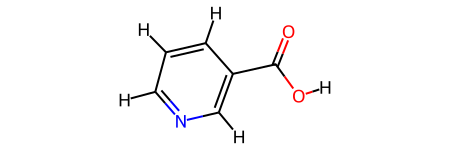

In [25]:
pk.mol

In [26]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.65771456  0.68267197 -0.56770471 -0.1156001   0.30462169 -0.59376361
  0.34062907 -0.31094079 -0.02553179  0.47952138  0.08794233  0.06731973
  0.15301584  0.15553354]
[-0.61217976  0.81292837 -0.5717529  -0.24287236  0.17811137 -0.55095487
  0.14930084 -0.22186454 -0.03890367  0.366904    0.19180823  0.16312898
  0.16853478  0.20781152]
[-0.28066335  0.34109517 -0.35822025 -0.12007433  0.03310015 -0.19875944
  0.02178609 -0.15136461 -0.01647688  0.24111054  0.12068431  0.11547793
  0.11657479  0.13572988]


In [27]:
mol = pk.mol
atoms = mol.GetAtoms()

In [28]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [29]:
df = pd.DataFrame(data)

In [30]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,O,-0.658,-0.612,-0.281
1,C,0.683,0.813,0.341
2,O,-0.568,-0.572,-0.358
3,C,-0.116,-0.243,-0.120
4,C,0.305,0.178,0.033
5,N,-0.594,-0.551,-0.199
6,C,0.341,0.149,0.022
7,C,-0.311,-0.222,-0.151
8,C,-0.026,-0.039,-0.016
9,H,0.480,0.367,0.241


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
plt.style.use('ggplot')

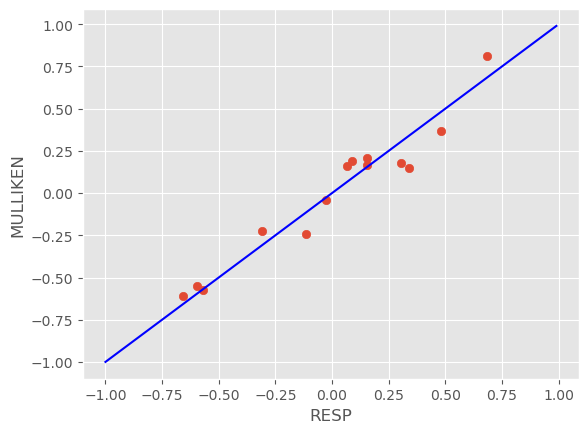

In [33]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

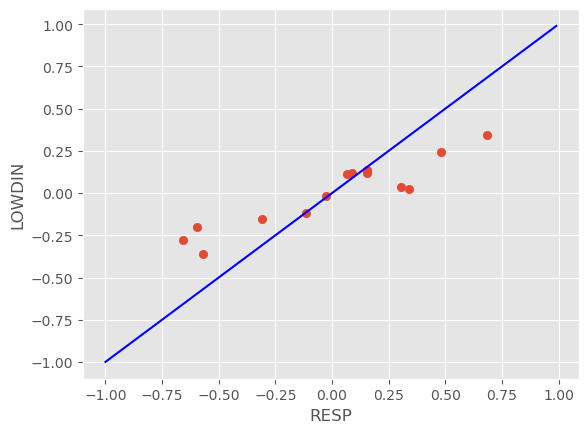

In [34]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

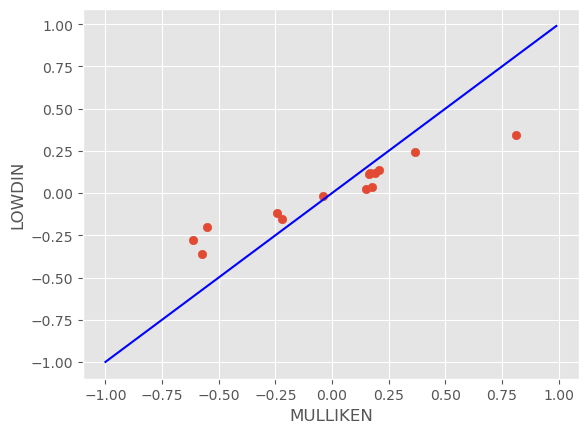

In [35]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')